# Determining gender based on image analysis

## Importing essential libraries

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Loading a datasets

### Attribute labels for each image

In [5]:
attributes = pd.read_csv(path0, index_col= 'image_id', usecols=['image_id', 'Male'])

In [6]:
attributes.head()

,Male
image_id,
000001.jpg,-1
000002.jpg,-1
000003.jpg,1
000004.jpg,-1
000005.jpg,-1


### Recommended partitioning of images into learning sets, validating, testing

In [7]:
lvts = pd.read_csv(path1, index_col='image_id')

In [8]:
lvts.head()

,partition
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0


### Loading images and labels divided into training, validation and test sets

In [ ]:
path = r'/content/img_align_celeba/img_align_celeba'

img_size = 64

X = []
image_id_list = os.listdir(path)
image_id_list.sort()

for i in image_id_list:
    
    image = cv2.imread(path + '/' + i)
    image = image.astype('uint8')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (img_size, img_size))
    X.append(image)

## Image Overview

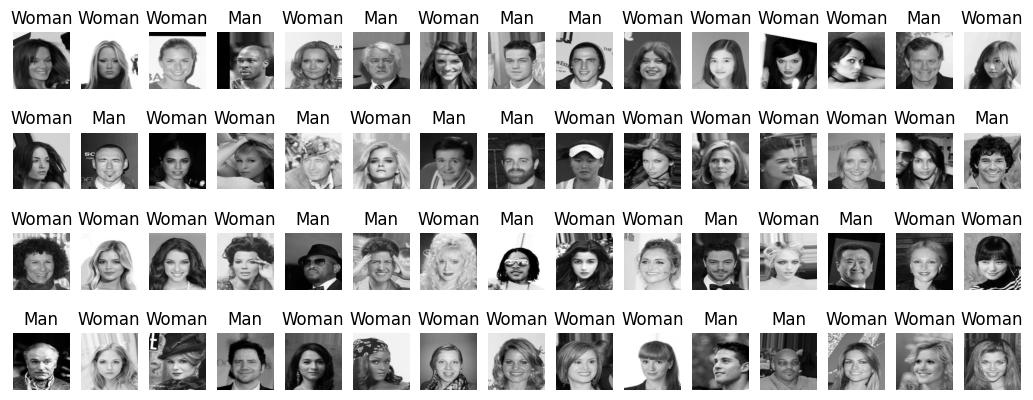

## Data distribution

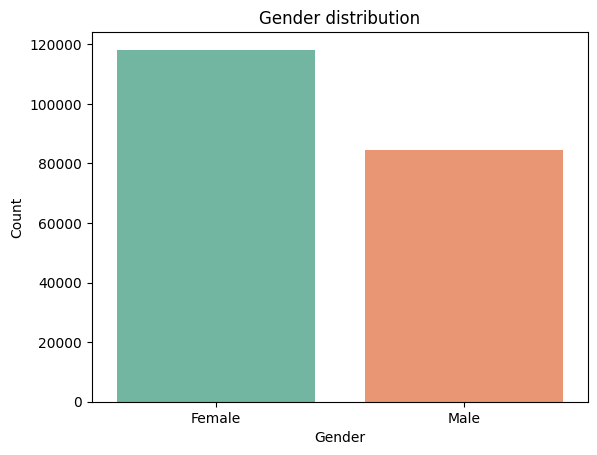

## Data preparation

### X

In [ ]:
train_index = len(lvts[lvts['partition']==0])
test_index = train_index + len(lvts[lvts['partition']==1])

In [ ]:
X = np.array(X).astype('float32')/255

In [ ]:
X_train= X[:train_index]
X_test= X[train_index:test_index]
X_val= X[test_index:]

### y

In [ ]:
attributes = attributes['Male'].apply(lambda x: 0 if (x == -1) else x)

In [ ]:
y_train= np.array(attributes[:train_index])
y_test= np.array(attributes[train_index:test_index])
y_val= np.array(attributes[test_index:])

## Model

In [10]:
#parameters
input_shape = (img_size, img_size, 1)
kernel_size = 3
dropout = 0.3
pool_size = 2
batch_size = 2048
epochs = 20

In [11]:
model = Sequential()

# block 1
model.add(Conv2D(
          filters=32,
          kernel_size=kernel_size,
          activation='relu',
          padding='same',
          input_shape= input_shape))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size))

# block 2
model.add(Conv2D(filters= 64, 
                 kernel_size=kernel_size, 
                 activation= 'relu',
                 padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size))


model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                        

## Compile model

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

## Training

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1)

## Traning history

In [ ]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    
    plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()
    
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
    
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

In [ ]:
plot_history(history)

### Loss

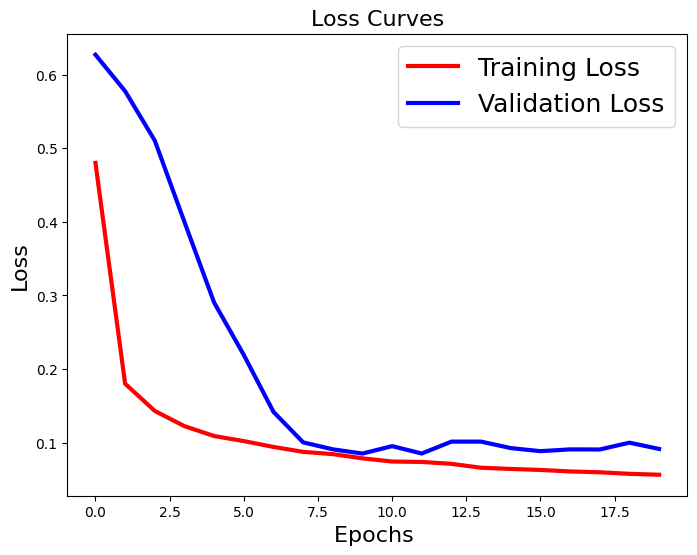

### Accuracy

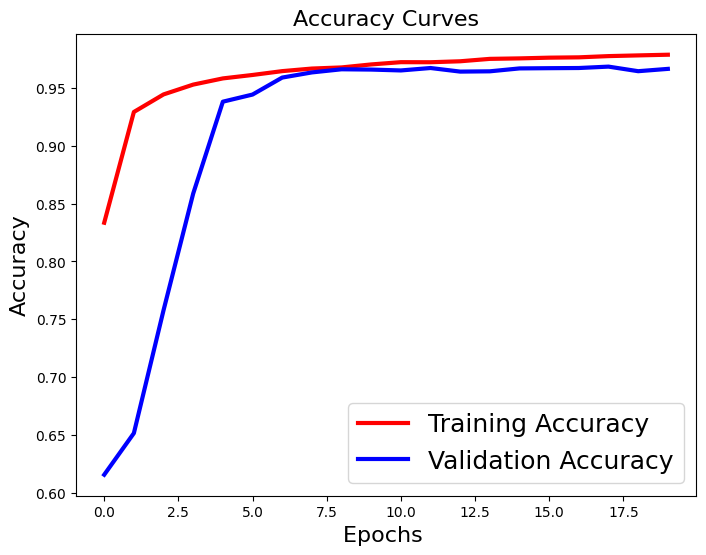

## Results

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11409
           1       0.97      0.97      0.97      8458

    accuracy                           0.97     19867
    macro avg      0.97      0.97      0.97     19867
    weighted avg   0.97      0.97      0.97     19867